# The Battle of the Neighborhoods - Where to open an Ukrainian Restaurant in the United States of America

## Introduction/Business Backgound

When I think about opening my own business, one of the options I am considering is the opening of Ukrainian restaurant in U.S.

My goal is to figure out, what city is the best place for opening such venue.

My main target are immigrants  from Ukraine and tourists who would like to taste traditional Ukrainian cuisine.


## Data
Based on definition of our problem, factors that will influence my decision are:

1. Main cities where Ukrainian Americans live.
2. Security level based on crime statistics

We will use the FourSquare API to collect data about locations of Ukrainian restaurants in cities, we choose for our analysis.
To determine the safest neighborhood for opening our restaurant, we will use data sets from police departments, like from Police Department Incident Reports from DataSF.org site for San Francisco.

## Methodology
My first goal is to determine main cities where Ukrainian Americans live.

According to Wikipedia (https://en.wikipedia.org/wiki/Ukrainian_Americans) New York, Philadelphia and Chicago are TOP3 cities:

1. New York: 160, 000;
2. Philadelphia: 60,000;
3. Chicago: 46,000.

As San Francisco Bay Area Resident, I also added San Francisco to my analysis.

Therefore, I am going to work with below city list.

1. New York;
2. Philadelphia;
3. Chicago;
4. San Francisco.

Working with FourSquare API, I used venues channel, near queries to get venues in the cities we selected before.

CategoryID was used to show only Ukrainian Restaurants (CategoryID of Ukrainian Restaurant is 52e928d0bcbc57f1066b7e96)

### Working with data

**Importing all required packages**

In [1]:
!pip install folium #On some configurations we need to install folium using this command
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from pandas import DataFrame
import matplotlib.pyplot as plt
import folium
print('All packages imported.')

     |████████████████████████████████| 92kB 15.7MB/s eta 0:00:01
All packages imported.


**Setup Foursquare credentials**

In [2]:
CLIENT_ID = 'TM0TJUFQ5DEQ23SNUHP5IQ5RM41QPO0SHAC1NKCTYV4IYMGA' # your Foursquare ID
CLIENT_SECRET = 'TWM5SLF3DLQLJQJSJQIUOVVUJT5NCMHJZQLRWBZ0HBTDBNLY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)

Your credentails:
CLIENT_ID: TM0TJUFQ5DEQ23SNUHP5IQ5RM41QPO0SHAC1NKCTYV4IYMGA


**Using Foursquare API for getting info about Ukrainian restaurants**

In [3]:
LIMIT = 500 # Maximum is 100
cities = ['New York, NY', 'Philadelphia, PA', 'Chicago, IL','San Francisco, CA']

results = {}
for city in cities:
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        city,
        LIMIT,
        "52e928d0bcbc57f1066b7e96") # Ukrainian Restaraunt CATEGORY ID
    results[city] = requests.get(url).json()

In [4]:
df_venues={}
for city in cities:
    venues = json_normalize(results[city]['response']['groups'][0]['items'])
    df_venues[city] = venues[['venue.name', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']]
    df_venues[city].columns = ['Name', 'Address', 'Lat', 'Lng']

**Determing how many Ukrainian restaurants available in each city from the list** 

In [5]:
maps = {}
for city in cities:
    city_lat = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lat'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lat']])
    city_lng = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lng'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lng']])
    maps[city] = folium.Map(location=[city_lat, city_lng], zoom_start=11)

    # add markers to map
    for lat, lng, label in zip(df_venues[city]['Lat'], df_venues[city]['Lng'], df_venues[city]['Name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(maps[city])  
    print(f"Total number of Ukrainian Restaurant in {city} = ", results[city]['response']['totalResults'])

Total number of Ukrainian Restaurant in New York, NY =  18
Total number of Ukrainian Restaurant in Philadelphia, PA =  3
Total number of Ukrainian Restaurant in Chicago, IL =  9
Total number of Ukrainian Restaurant in San Francisco, CA =  1


As we see, there is only one Ukrainian restaurant in San Francisco!

Therefore, there is my first conclusion: if I planned the opening of a Ukrainian restaurant, I would do it in San Francisco!

**Visualizing Ukrainian restaraunts on San Francisco map**

In [13]:
maps[cities[3]]

**Now I need to determine the most safest neiborhood in San Francisco, using SFPD accident reports database**

In [7]:
#reading intitial data from datasf.org
sf_crime_df_raw = pd.read_csv('https://data.sfgov.org/resource/wg3w-h783.csv?$limit=400000')
sf_crime_df_raw.head()

incident_datetime            incident_date incident_time  \
0  2020-02-03T14:45:00.000  2020-02-03T00:00:00.000         14:45   
1  2020-02-03T03:45:00.000  2020-02-03T00:00:00.000         03:45   
2  2020-02-03T10:00:00.000  2020-02-03T00:00:00.000         10:00   
3  2020-01-19T17:12:00.000  2020-01-19T00:00:00.000         17:12   
4  2020-01-05T00:00:00.000  2020-01-05T00:00:00.000         00:00   

   incident_year incident_day_of_week          report_datetime       row_id  \
0           2020               Monday  2020-02-03T17:50:00.000  89881675000   
1           2020               Monday  2020-02-03T03:45:00.000  89860711012   
2           2020               Monday  2020-02-03T10:06:00.000  89867264015   
3           2020               Sunday  2020-02-01T13:01:00.000  89863571000   
4           2020               Sunday  2020-02-03T16:09:00.000  89877368020   

   incident_id  incident_number   cad_number report_type_code  \
0       898816        200085557  200342870.0               II   
1       898607        200083749  200340316.0               II   
2       898672        200084060  200340808.0               II   
3       898635        206024187          NaN               II   
4       898773        200085193  200342341.0               II   

  report_type_description filed_online  incident_code  \
0                 Initial          NaN          75000   
1                 Initial          NaN          11012   
2                 Initial          NaN          64015   
3        Coplogic Initial         True          71000   
4                 Initial          NaN          68020   

             incident_category         incident_subcategory  \
0               Missing Person               Missing Person   
1              Stolen Property              Stolen Property   
2                 Non-Criminal                        Other   
3                Lost Property                Lost Property   
4  Miscellaneous Investigation  Miscellaneous Investigation   

                                incident_description            resolution  \
0                                       Found Person        Open or Active   
1  Stolen Property, Possession with Knowledge, Re...  Cite or Arrest Adult   
2                 Aided Case, Injured or Sick Person        Open or Active   
3                                      Lost Property        Open or Active   
4                        Miscellaneous Investigation        Open or Active   

              intersection         cnn police_district  \
0    20TH AVE \ WINSTON DR  33719000.0         Taraval   
1    24TH ST \ SHOTWELL ST  24064000.0         Mission   
2    MARKET ST \ POWELL ST  34016000.0      Tenderloin   
3                      NaN         NaN         Taraval   
4  PINE ST \ DIVISADERO ST  26643000.0        Richmond   

            analysis_neighborhood  supervisor_district   latitude   longitude  \
0                       Lakeshore                  7.0  37.726950 -122.476039   
1                         Mission                  9.0  37.752440 -122.415172   
2  Financial District/South Beach                  3.0  37.784560 -122.407337   
3                             NaN                  NaN        NaN         NaN   
4                 Pacific Heights                  2.0  37.787112 -122.440250   

                                              point  \
0   \n,  \n(37.72694991292525, -122.47603947349434)   
1  \n,  \n(37.752439644389675, -122.41517229045435)   
2  \n,  \n(37.784560141211806, -122.40733704162238)   
3                                               NaN   
4   \n,  \n(37.78711245591735, -122.44024995765258)   

   :@computed_region_6qbp_sg9q  :@computed_region_qgnn_b9vv  \
0                         41.0                         10.0   
1                         53.0                          3.0   
2                         19.0                          5.0   
3                          NaN                          NaN   
4                        103.0                         

In [8]:
sf_crime_df_raw.shape #checking if request limit was set correctly

(338005, 36)

In [9]:
sf_crime_df_raw.columns# getting list of all columns in report

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district', 'latitude', 'longitude',
       'point', ':@computed_region_6qbp_sg9q', ':@computed_region_qgnn_b9vv',
       ':@computed_region_26cr_cadq', ':@computed_region_ajp5_b2md',
       ':@computed_region_nqbw_i6c3', ':@computed_region_2dwj_jsy4',
       ':@computed_region_h4ep_8xdi', ':@computed_region_y6ts_4iup',
       ':@computed_region_jg9y_a9du', ':@computed_region_6pnf_4xz7'],
      dtype='object')

In [10]:
#selecting columns we need dor our analysis
sf_crime_df=sf_crime_df_raw[['incident_year', 'incident_description',  
       'analysis_neighborhood', 'latitude', 'longitude']]

In [11]:
#Giving meaningful names to columns and reordering them in more convinien way
sf_crime_df.columns= ['Year', 'Category', 'Neighborhood', 'Latitude', 'Longitude']
column_names = ['Category', 'Neighborhood', 'Year',  'Latitude', 'Longitude']
sf_crime_df=sf_crime_df.reindex(columns=column_names)
sf_crime_df.head()

Category  \
0                                       Found Person   
1  Stolen Property, Possession with Knowledge, Re...   
2                 Aided Case, Injured or Sick Person   
3                                      Lost Property   
4                        Miscellaneous Investigation   

                     Neighborhood  Year   Latitude   Longitude  
0                       Lakeshore  2020  37.726950 -122.476039  
1                         Mission  2020  37.752440 -122.415172  
2  Financial District/South Beach  2020  37.784560 -122.407337  
3                             NaN  2020        NaN         NaN  
4                 Pacific Heights  2020  37.787112 -122.440250

In [12]:
#Removing all rows with missing info
sf_crime_df.dropna()

**Total crime quantities by neighborhoods**

In [14]:
sf_crime_df['Neighborhood'].value_counts()

Mission                           37040
Tenderloin                        33283
Financial District/South Beach    29919
South of Market                   27895
Bayview Hunters Point             18678
Western Addition                  10628
North Beach                       10148
Castro/Upper Market                9716
Sunset/Parkside                    9315
Nob Hill                           9270
Hayes Valley                       8771
Marina                             7719
Russian Hill                       7310
Outer Richmond                     7046
Chinatown                          6443
West of Twin Peaks                 6394
Bernal Heights                     5603
Mission Bay                        5469
Haight Ashbury                     5401
Pacific Heights                    5312
Potrero Hill                       5117
Excelsior                          5072
Outer Mission                      4362
Inner Richmond                     4225
Lone Mountain/USF                  3898


**Crimes breakdown by type and neighborhood**

In [15]:
sf_crime_df_table = pd.pivot_table(sf_crime_df,
                               values=['Year'],
                               index=['Neighborhood'],
                               columns=['Category'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
sf_crime_df_table

Year  \
Category                       ATM-related Crime (secondary code only)   
Neighborhood                                                             
Bayview Hunters Point                                                1   
Bernal Heights                                                       0   
Castro/Upper Market                                                  1   
Chinatown                                                            3   
Excelsior                                                            0   
Financial District/South Beach                                       6   
Glen Park                                                            0   
Golden Gate Park                                                     0   
Haight Ashbury                                                       0   
Hayes Valley                                                         1   
Inner Richmond                                                       1   
Inner Sunset                                                         1   
Japantown                                                            0   
Lakeshore                                                            0   
Lincoln Park                                                         0   
Lone Mountain/USF                                                    1   
Marina                                                               1   
McLaren Park                                                         0   
Mission                                                              4   
Mission Bay                                                          2   
Nob Hill                                                             5   
Noe Valley                                                           0   
North Beach                                                          1   
Oceanview/Merced/Ingleside                                           0   
Outer Mission                                                        0   
Outer Richmond                                                       0   
Pacific Heights                                                      0   
Portola                                                              2   
Potrero Hill                                                         0   
Presidio                                                             0   
Presidio Heights                                                     1   
Russian Hill                                                         1   
Seacliff                                                             0   
South of Market                                                      0   
Sunset/Parkside                                                      2   
Tenderloin                                                           2   
Treasure Island                                                      0   
Twin Peaks                                                           0   
Visitacion Valley                                                    0   
West of Twin Peaks                                                   1   
Western Addition                                                     0   
All                                                                 37   

                                                   \
Category                       Abortion, Unlawful   
Neighborhood                                        
Bayview Hunters Point                           0   
Bernal Heights                                  0   
Castro/Upper Market                             0   
Chinatown                                       0   
Excelsior                                       0   
Financial District/South Beach                  0   
Glen Park                                       0   
Golden Gate Park                                0   
Haight Ashbury                                  0   
Hayes Valley                                    0   
Inner Richmond                                

**Merge pivoted column with other columns**

In [16]:
sf_crime_df_table.reset_index(inplace = True)
sf_crime_df_table.columns = sf_crime_df_table.columns.map(''.join)
sf_crime_df_table.rename(columns={'YearAll':'Total'}, inplace=True)
# To ignore bottom All in Neighborhood
sf_crime_df_table=sf_crime_df_table.head(40)
sf_crime_df_table

Neighborhood  \
0            Bayview Hunters Point   
1                   Bernal Heights   
2              Castro/Upper Market   
3                        Chinatown   
4                        Excelsior   
5   Financial District/South Beach   
6                        Glen Park   
7                 Golden Gate Park   
8                   Haight Ashbury   
9                     Hayes Valley   
10                  Inner Richmond   
11                    Inner Sunset   
12                       Japantown   
13                       Lakeshore   
14                    Lincoln Park   
15               Lone Mountain/USF   
16                          Marina   
17                    McLaren Park   
18                         Mission   
19                     Mission Bay   
20                        Nob Hill   
21                      Noe Valley   
22                     North Beach   
23      Oceanview/Merced/Ingleside   
24                   Outer Mission   
25                  Outer Richmond   
26                 Pacific Heights   
27                         Portola   
28                    Potrero Hill   
29                        Presidio   
30                Presidio Heights   
31                    Russian Hill   
32                        Seacliff   
33                 South of Market   
34                 Sunset/Parkside   
35                      Tenderloin   
36                 Treasure Island   
37                      Twin Peaks   
38               Visitacion Valley   
39              West of Twin Peaks   

    YearATM-related Crime (secondary code only)  YearAbortion, Unlawful  \
0                                             1                       0   
1                                             0                       0   
2                                             1                       0   
3                                             3                       0   
4                                             0                       0   
5                                             6                       0   
6                                             0                       0   
7                                             0                       0   
8                                             0                       0   
9                                             1                       0   
10                                            1                       0   
11                                            1                       0   
12                                            0                       0   
13                                            0                       0   
14                                            0                       0   
15                                            1                       0   
16                                            1                       0   
17                                            0                       0   
18                                            4                       0   
19                                            2                       0   
20                                            5                       0   
21                                            0                       0   
22                                            1                       0   
23                                            0                       0   
24                                            0                       0   
25                                            0                       0   
26                                            0                       0   
27                                            2                       0   
28                                            0                       0   
29                                            0                       0   
30                                            1                       0   
31                                            1                

**TOP5 SF neighborhoods with lowest crime**

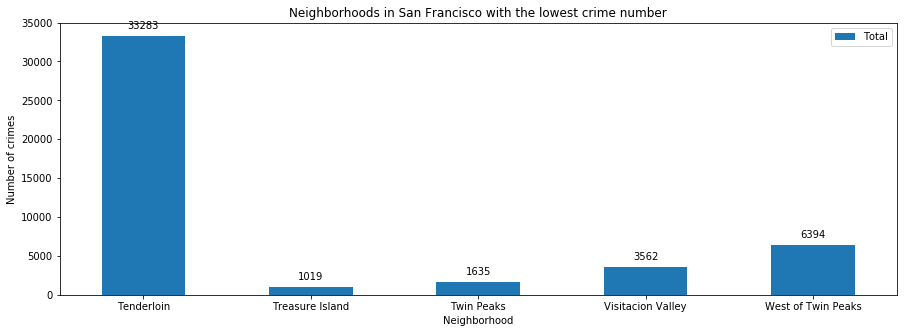

In [22]:
sf_crime_df_table.sort_values(by=['Total'] )

sf_crime_neigh_safe5 = sf_crime_df_table.tail(5)
sf_crime_neigh_safe5
per_neigh = sf_crime_neigh_safe5[['Neighborhood','Total']]

per_neigh.set_index('Neighborhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(15, 5), rot=0)

ax.set_ylabel('Number of crimes')
ax.set_xlabel('Neighborhood')
ax.set_title('Neighborhoods in San Francisco with the lowest crime number')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10,
              )

plt.show()

I do not think that it is possible to open a restaraunt on Treasure Island, Twin Peaks is the best neighborhood in San Francisco for that!

### Discussion

Based on my analysis, at first sight San Francisco is the best city for opening Ukrainian restaurant.

However, for further analysis I need to take into considerations more factors like the cities that are most popular among Ukrainian tourists, availability of Eastern European restaurants (Polish, Russian, etc.), etc.

### Conclusion
I have no doubt that Twin Peaks neighborhood of San Francisco is the best place to open my first restaurant in US.

Laskavo prosymo!! (Welcome in Ukrainian)
